## ***BREAST CANCER DETECTION MODEL***
Using Logistic Regression

# **Import Necessary Libraries**

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import joblib


**Summary:**
In this step, we import the essential libraries and modules required for data manipulation, visualization, preprocessing, model training, evaluation, and saving the trained model.



# **Load and Explore the Dataset**

In [2]:
# Step 2: Load and Explore the Dataset
file_path = "/content/data.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Preview the dataset
print("First few rows of the dataset:")
display(df.head())

# Check basic statistics
print("\nDataset Summary:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


First few rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset Summary:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



Missing Values:


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**Summary:**
This step involves loading the Breast Cancer Wisconsin dataset and exploring its basic statistics, checking for missing values, and viewing the first few rows. It helps us understand the structure of the data.

# **Preprocessing the Data**

In [3]:
# Step 3: Preprocessing
# Drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

# Map target variable to binary (M -> 1, B -> 0)
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})


**Summary:**
In this preprocessing step, we clean the dataset by dropping irrelevant columns and transforming the target variable (diagnosis) into a binary format where "M" becomes 1 (malignant) and "B" becomes 0 (benign).

# **Exploratory Data Analysis(EDA)**

<ipython-input-4-7bca07e9f11a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='diagnosis', palette='Set2')


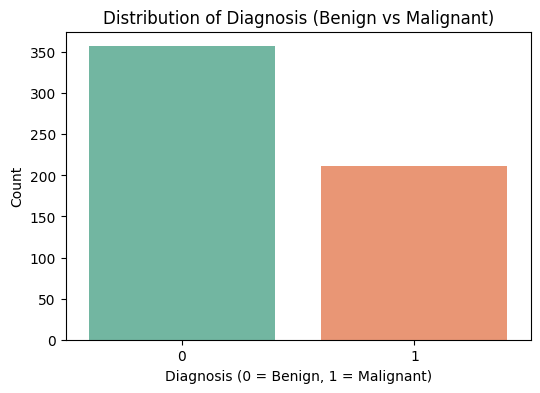

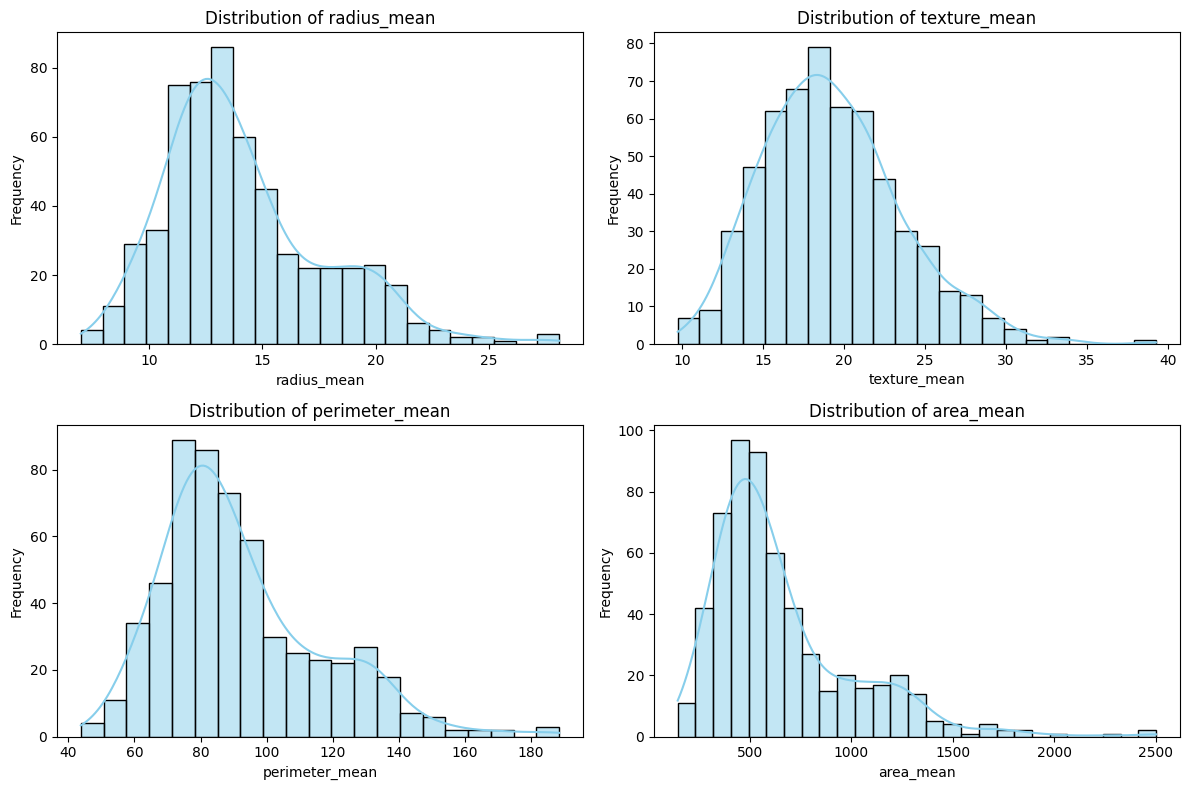

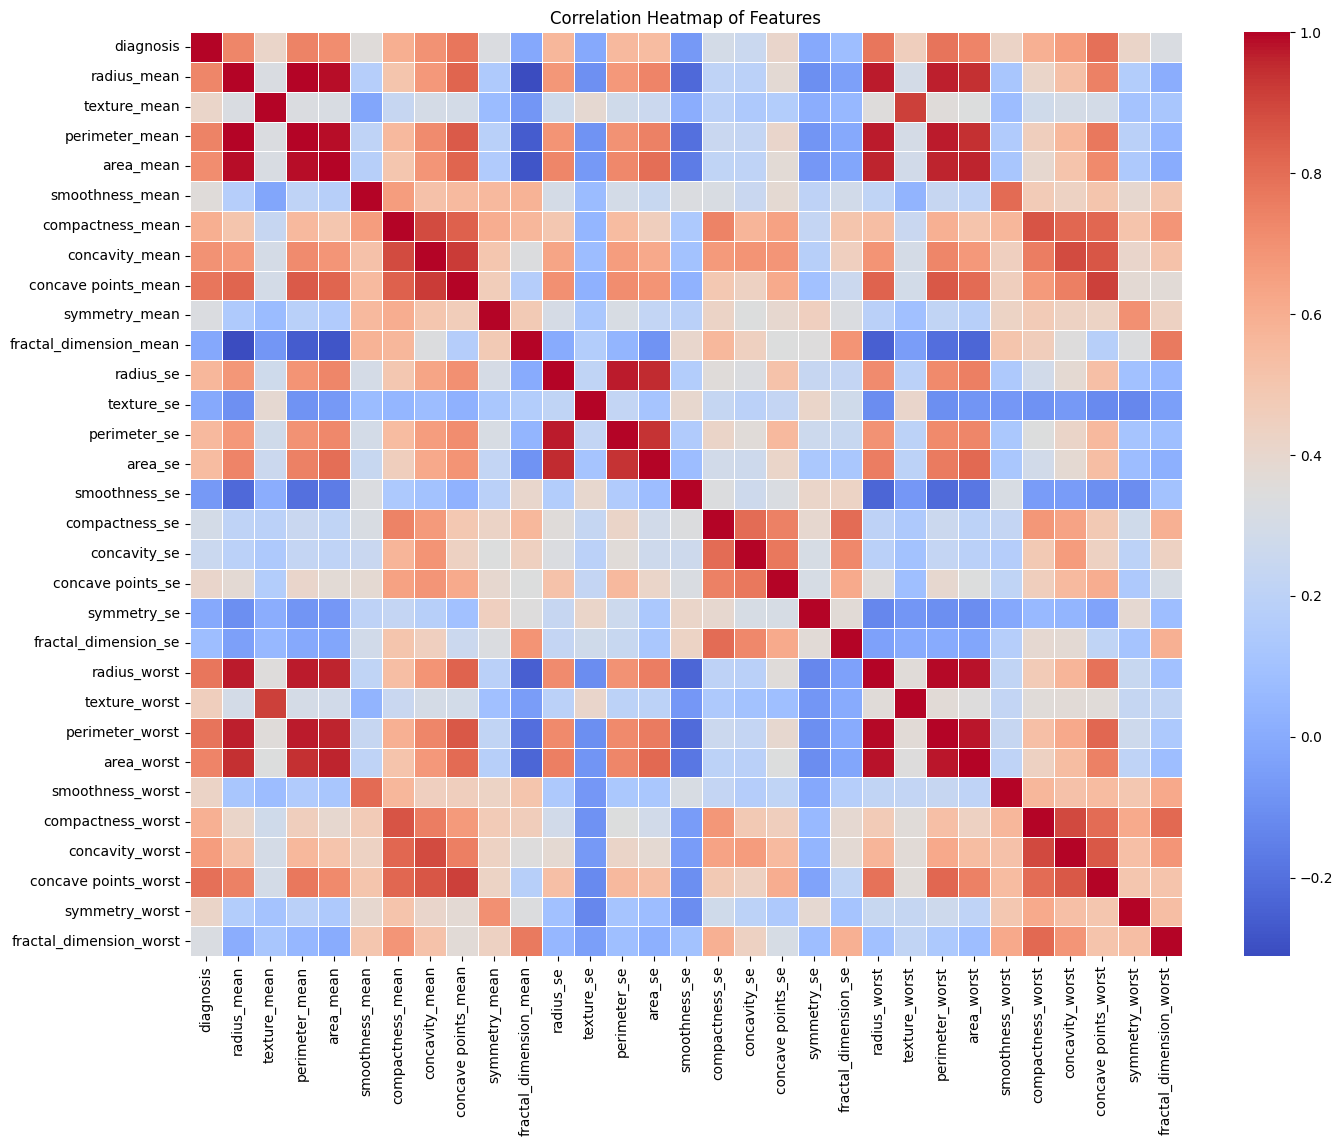

In [4]:
# Step 4: Exploratory Data Analysis (EDA)
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='diagnosis', palette='Set2')
plt.title("Distribution of Diagnosis (Benign vs Malignant)")
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()

# Feature distributions (subset)
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


**Summary:**
We perform exploratory data analysis (EDA) by visualizing the distribution of the target variable (diagnosis), the distribution of selected features, and the correlation matrix. These visualizations give insights into the data distribution and relationships between features.

# **Multicollinearity Analysis with VIF**

In [5]:
# Step 5: Multicollinearity Analysis with VIF
# Calculate VIF
X = df_cleaned.drop(columns=['diagnosis'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Drop features with high VIF
features_to_drop = ['perimeter_mean', 'radius_mean', 'perimeter_worst', 'area_worst']
df_reduced = df_cleaned.drop(columns=features_to_drop)

# Recalculate VIF
X_reduced = df_reduced.drop(columns=['diagnosis'])
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print("\nReduced VIF Scores:")
print(vif_data_reduced.sort_values(by="VIF", ascending=False))



VIF Scores:
                    Feature           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  a

**Summary:**
In this step, we analyze the multicollinearity between features using the Variance Inflation Factor (VIF). Features with high VIF scores are dropped to reduce multicollinearity, which can negatively affect the model performance.

# **Feature Scaling**

In [6]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

**Summary:**
Feature scaling is performed to standardize the feature values, making them comparable and suitable for dimensionality reduction (PCA) and model training.

# **Dimensionality Reduction with PCA**

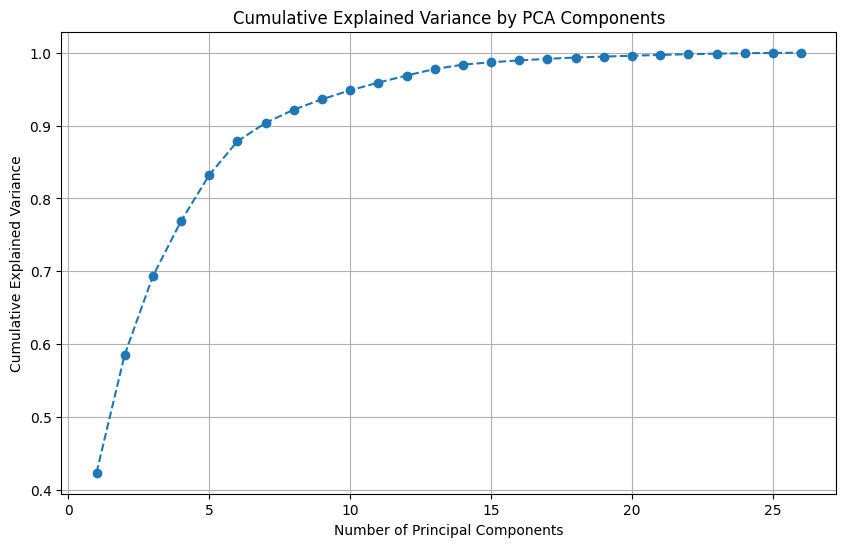

In [7]:
# Step 7: Dimensionality Reduction with PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Retain components explaining ~95% variance
pca = PCA(n_components=10)
X_pca_reduced = pca.fit_transform(X_scaled)


**Summary:**
We apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining most of the variance. We also plot the cumulative explained variance to determine the number of components to retain.

# **Train-Test Split**

In [8]:
# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, df_reduced['diagnosis'], test_size=0.2, random_state=42)

**Summary:**
The dataset is split into training and testing sets (80% for training and 20% for testing) to evaluate the model's performance on unseen data.

# **Logistic Regression Model**


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



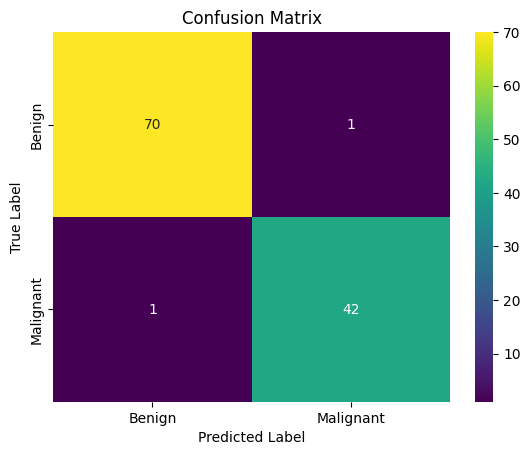

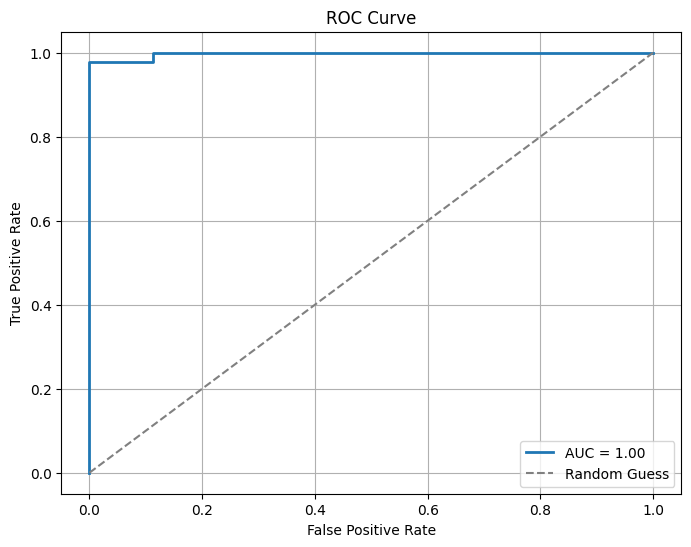

In [9]:
# Step 9: Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Summary:**
We build and train a Logistic Regression model. The model is evaluated using various metrics, including the classification report, confusion matrix, and ROC curve. These help assess the model's accuracy and performance.

# **Graphical Respresentation Of Model Accuracy**



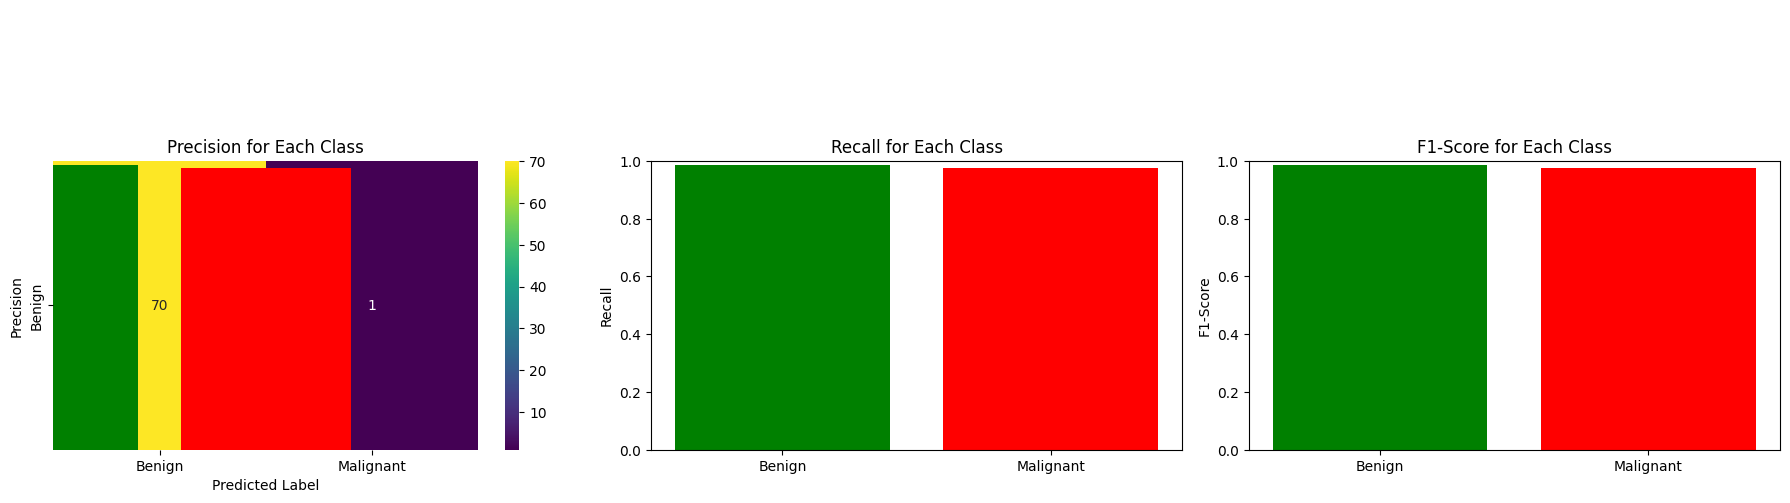

In [10]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting - Combine confusion matrix and performance metrics in one graph
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Prepare data for performance metrics (precision, recall, F1-score)
report = classification_report(y_test, y_pred, output_dict=True)
labels = ['Benign', 'Malignant']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

metrics = [precision, recall, f1_score]
metrics_labels = ['Precision', 'Recall', 'F1-Score']

# Plot Precision, Recall, and F1-Score
# Change here: Start the loop from 0 to correctly index into the 'ax' array
for i, metric in enumerate(metrics):  # Loop through each metric
    ax[i].bar(labels, metric, color=['green', 'red'])  # Use correct indexing
    ax[i].set_title(f'{metrics_labels[i]} for Each Class')
    ax[i].set_ylabel(f'{metrics_labels[i]}')
    ax[i].set_ylim([0, 1])  # Keep the y-axis range between 0 and 1 for better comparison

# Show the plots
plt.tight_layout()
plt.show()

# **Precision-Recall Tuning (OPTIONAL)**


Optimal Threshold: 0.73
Precision: 1.00, Recall: 0.98

Classification Report with Tuned Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



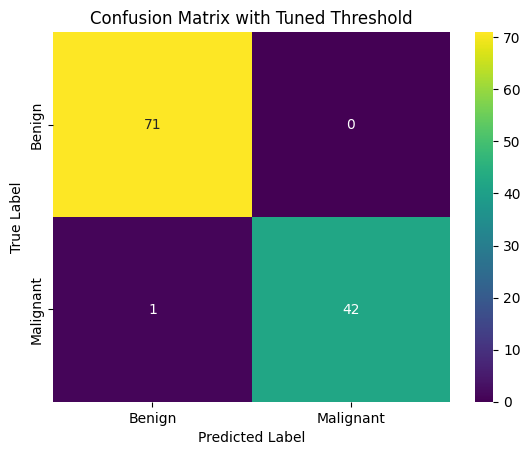

In [11]:
# Step 10: Precision-Recall Tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}")

# Predict using the tuned threshold
y_pred_tuned = (y_proba >= optimal_threshold).astype(int)

# Evaluate with the tuned threshold
print("\nClassification Report with Tuned Threshold:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for Tuned Threshold
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='viridis', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix with Tuned Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Summary:**
We fine-tune the model’s classification threshold based on the F1 score to balance precision and recall, and then re-evaluate the model's performance using the new threshold.

# **Saving the Model and PCA Pipeline**

In [12]:
# Step 11: Save the Model and PCA Pipeline
joblib.dump(model, 'breast_cancer_model.pkl')
joblib.dump(pca, 'pca_pipeline.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Summary:**
Finally, we save the trained Logistic Regression model, PCA pipeline, and scaler using joblib, which allows us to reload and use the model for future predictions.

# **Using the Saved Model**

In [13]:
# Load saved model, PCA pipeline, and scaler
model = joblib.load('breast_cancer_model.pkl')
pca = joblib.load('pca_pipeline.pkl')
scaler = joblib.load('scaler.pkl')

# Step 1: Define the features required (based on your processed dataset after VIF analysis)
# These are the features retained after dropping: ['perimeter_mean', 'radius_mean', 'perimeter_worst', 'area_worst']
required_features = [
    'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
    'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Step 2: Create a new data example
# Replace these values with actual measurements to test the model
new_data = pd.DataFrame({
    'texture_mean': [20.0],
    'area_mean': [600.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.2],
    'concavity_mean': [0.2],
    'concave points_mean': [0.1],
    'symmetry_mean': [0.3],
    'fractal_dimension_mean': [0.06],
    'radius_se': [0.5],
    'texture_se': [1.0],
    'perimeter_se': [3.0],
    'area_se': [40.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.02],
    'concave points_se': [0.01],
    'symmetry_se': [0.02],
    'fractal_dimension_se': [0.003],
    'radius_worst': [15.0],
    'texture_worst': [25.0],
    'smoothness_worst': [0.14],
    'compactness_worst': [0.3],
    'concavity_worst': [0.4],
    'concave points_worst': [0.2],
    'symmetry_worst': [0.35],
    'fractal_dimension_worst': [0.08]
})

# Step 3: Preprocess the new data
# Standardize the features
new_data_scaled = scaler.transform(new_data)

# Apply PCA transformation
new_data_pca = pca.transform(new_data_scaled)

# Step 4: Make a prediction
prediction = model.predict(new_data_pca)
prediction_proba = model.predict_proba(new_data_pca)[:, 1]

# Step 5: Display the result
if prediction[0] == 0:
    print("The prediction is: Benign (0)")
else:
    print("The prediction is: Malignant (1)")

print(f"Prediction Probability (Malignant): {prediction_proba[0]:.2f}")


The prediction is: Malignant (1)
Prediction Probability (Malignant): 0.99


**Summary:**
In this step, we load the previously saved Logistic Regression model, PCA pipeline, and scaler using joblib.load(). This allows us to use the trained model to make predictions on new data.